# Intro

 - Univariate Data

- Values are indexed by time

- Observations captured in constant time intervals

- To understand the properties of the complex system that sends data.

- Perform Analysis to check if the past values are in any way affecting the future values.

- How accurately can the future values be predicted?

- To describe the basic properties of a given system.

- The same data is captured over a series of time intervals and the models are also a bit unique to the data.

- Ideally, when you collect observations, you capture multiple data attributes, so we apply multivariate models in those situations.

# Date and Time

Indexing is the process of sequencing a given set of data points for easy searching and retrieval.

Ideally indexing is just numbering or sequencing the data based on a numeric.

For time series data, the date-time attribute is the index.

Here the data points are studied at different time steps.

Date as Index has several advantages. 

It gives you flexibility to aggregate and disintegrate your data based on any time step.

In [1]:
import pandas as pd
import numpy as np 
date = [pd.Timestamp("2017-01-01"),
        pd.Timestamp("2017-01-02"),
        pd.Timestamp("2017-01-03")]
timeSeries = pd.Series(np.random.randn(len(date)), index=date)
print(timeSeries.index)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq=None)


In [2]:
timeSeries

2017-01-01   -0.301548
2017-01-02    0.292935
2017-01-03    0.243829
dtype: float64

In [3]:
timeSeries['2017-01-01']

-0.30154780413094323

In [4]:
timeSeries['2017-01-01':'2017-01-03']

2017-01-01   -0.301548
2017-01-02    0.292935
2017-01-03    0.243829
dtype: float64

In time series, sometimes the date values are not provided explicitly. So how will you generate the date time values and index in that scenario?

date_range() Function in Python helps in creating a set of sequential date time values in a given range.

There are many ways to create a sequence of dates based on the parameters passed to the function.

The date_range() function in Python has multiple features and parameters. You have the flexibility to generate date values in many ways.

Say you know the start date and the end date, and you would want to generate a set of dates in that range. Can be done follwing way:

In [5]:
pd.date_range(start='2017-01-01',end='2017-01-19',freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19'],
              dtype='datetime64[ns]', freq='B')

Here the Start Date was Jan 1 , 2017 and the end date is Jan 19 , 2017. The freq = 'B' signifies business day. Hence you will not find any date that is a saturday or sunday.

freq='H' is for hourly generation
freq='T' is for minute generation
freq='S' is for seconds generation

reer more at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [6]:
# want to generate date-time values that are 1 day, 1 hour, 1 minute and 10 seconds apart.

pd.date_range(start="2017-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-02 01:01:10',
               '2017-01-03 02:02:20', '2017-01-04 03:03:30',
               '2017-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

In [7]:
# you want to generate date time stamp every Friday for five instances from a given start date.
pd.date_range(start="2017-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27',
               '2017-02-03'],
              dtype='datetime64[ns]', freq='W-FRI')

In [8]:
#  generated separate indices with different dates and would want to combine them

a = pd.date_range(start="2017-01-01", periods=10, freq='BAS-JAN')
b = pd.date_range(start="2017-01-01", periods=10, freq='A-FEB')
a.union(b)

DatetimeIndex(['2017-01-02', '2017-02-28', '2018-01-01', '2018-02-28',
               '2019-01-01', '2019-02-28', '2020-01-01', '2020-02-29',
               '2021-01-01', '2021-02-28', '2022-01-03', '2022-02-28',
               '2023-01-02', '2023-02-28', '2024-01-01', '2024-02-29',
               '2025-01-01', '2025-02-28', '2026-01-01', '2026-02-28'],
              dtype='datetime64[ns]', freq=None)

# Resampling

You have your time series data captured in a specific time interval (frequency). This could be Hourly, Daily, and Weekly but you are interested in aggregating this date at a different frequency, i.e., Monthly, Yearly, etc. How do you think you can achieve that?

 Resampling will help you.

   - Resampling is the process of converting your time series data from a given frequency to the desired frequency.

    -   Upsampling is converting the data from a low frequency to a high frequency.

    - Downsampling is converting the data from a high frequency to a low frequency.


The collected Time Series Data might not always be at uniform intervals. To study them, they have to be confined to regular time intervals.

Resampling helps in these situations.

**DOWNSAMPLING**

In [9]:
import numpy as np
import pandas as pd
customerArrival = pd.date_range('18/09/2017 8:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0, 100, len(customerArrival)), index=customerArrival)
custArrivalTs.head(10)

2017-09-18 08:00:00    96
2017-09-18 08:01:00    59
2017-09-18 08:02:00    14
2017-09-18 08:03:00    26
2017-09-18 08:04:00    90
2017-09-18 08:05:00    99
2017-09-18 08:06:00    60
2017-09-18 08:07:00    92
2017-09-18 08:08:00    82
2017-09-18 08:09:00    93
Freq: T, dtype: int64

You are not interested in customer incidence every minute but you would want to get the mean customer incidence every 10 mins.

You will resample (downsample) your time series in the following way.

In [10]:
custArrivalTs.resample('10min').mean().head()

2017-09-18 08:00:00    71.1
2017-09-18 08:10:00    50.2
2017-09-18 08:20:00    35.1
2017-09-18 08:30:00    63.1
2017-09-18 08:40:00    36.7
Freq: 10T, dtype: float64

In [11]:
# If you do not want the aggregation using the mean, you can specify your custom function.

custArrivalTs.resample('10min').sum().head()

2017-09-18 08:00:00    711
2017-09-18 08:10:00    502
2017-09-18 08:20:00    351
2017-09-18 08:30:00    631
2017-09-18 08:40:00    367
Freq: 10T, dtype: int64

In [12]:
custArrivalTs.resample('1h').max().head()

2017-09-18 08:00:00    99
2017-09-18 09:00:00    91
2017-09-18 10:00:00    99
2017-09-18 11:00:00    98
2017-09-18 12:00:00    99
Freq: H, dtype: int64

In [13]:
# When you perform down sampling and you want to write your own custom function, you can accomplish that in the following manner.

import random
custArrivalTs.resample('1h').apply(lambda m: random.choice(m)).head()

2017-09-18 08:00:00    95
2017-09-18 09:00:00    45
2017-09-18 10:00:00    67
2017-09-18 11:00:00    26
2017-09-18 12:00:00    29
Freq: H, dtype: int64

In [14]:
# Let's say you are analyzing customer incidence data. You would wish to see the 
# opening, closing, high and low incidence values in a given interval of time.

custArrivalTs.resample('1h').apply('ohlc').head()

,open,high,low,close
2017-09-18 08:00:00,96,99,1,25
2017-09-18 09:00:00,15,91,0,2
2017-09-18 10:00:00,92,99,0,76
2017-09-18 11:00:00,11,98,2,28
2017-09-18 12:00:00,26,99,3,99


**UPSAMPLING**

In upsampling, the frequency of the data points is more than that of the original data captured.

In [15]:
sampleRng = pd.date_range('9/18/2017 8:00', periods=10, freq='H')
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
smpl1 = sampleTs.copy()
smpl2 = sampleTs.copy()
sampleTs

2017-09-18 08:00:00    87
2017-09-18 09:00:00    97
2017-09-18 10:00:00    32
2017-09-18 11:00:00     6
2017-09-18 12:00:00     4
2017-09-18 13:00:00    40
2017-09-18 14:00:00    83
2017-09-18 15:00:00    88
2017-09-18 16:00:00     0
2017-09-18 17:00:00    66
Freq: H, dtype: int64

In [16]:
#  upsampled at 15 mins

sampleTs.resample('15min').mean().head(10)

2017-09-18 08:00:00    87.0
2017-09-18 08:15:00     NaN
2017-09-18 08:30:00     NaN
2017-09-18 08:45:00     NaN
2017-09-18 09:00:00    97.0
2017-09-18 09:15:00     NaN
2017-09-18 09:30:00     NaN
2017-09-18 09:45:00     NaN
2017-09-18 10:00:00    32.0
2017-09-18 10:15:00     NaN
Freq: 15T, dtype: float64

In [17]:
# The Forward and Backward filling can be used to fill missing values.

# In forward filling, you have to fill the missing values based on the forward values. (ffill)
# In backward filling, the missing values are filled from backwards. (bfill)
sampleTs = sampleTs.resample('15min')
sampleTs.ffill().head()

2017-09-18 08:00:00    87
2017-09-18 08:15:00    87
2017-09-18 08:30:00    87
2017-09-18 08:45:00    87
2017-09-18 09:00:00    97
Freq: 15T, dtype: int64

In [18]:
# When you fill the missing values, you can also limit the number of fills.
# smpl1.resample('15min', fill_method='ffill', limit=2).head()

**Interpolation**


Forward or Backward filling is a work around to fill the missing values.

It might not be accurate.

Some algorithms can fill the missing values based on the data patterns.

This approach works better to get more accurate insights from Time Series Data.

This method is called interpolation.

In [24]:
interEx = smpl2.resample('15min')
list(interEx)

[(Timestamp('2017-09-18 08:00:00', freq='15T'), 2017-09-18 08:00:00    87
  Freq: H, dtype: int64),
 (Timestamp('2017-09-18 08:15:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 08:30:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 08:45:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 09:00:00', freq='15T'), 2017-09-18 09:00:00    97
  Freq: H, dtype: int64),
 (Timestamp('2017-09-18 09:15:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 09:30:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 09:45:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 10:00:00', freq='15T'), 2017-09-18 10:00:00    32
  Freq: H, dtype: int64),
 (Timestamp('2017-09-18 10:15:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp('2017-09-18 10:30:00', freq='15T'),
  Series([], Freq: H, dtype: int64)),
 (Timestamp(

In [25]:
interEx.interpolate()

2017-09-18 08:00:00    87.00
2017-09-18 08:15:00    89.50
2017-09-18 08:30:00    92.00
2017-09-18 08:45:00    94.50
2017-09-18 09:00:00    97.00
2017-09-18 09:15:00    80.75
2017-09-18 09:30:00    64.50
2017-09-18 09:45:00    48.25
2017-09-18 10:00:00    32.00
2017-09-18 10:15:00    25.50
2017-09-18 10:30:00    19.00
2017-09-18 10:45:00    12.50
2017-09-18 11:00:00     6.00
2017-09-18 11:15:00     5.50
2017-09-18 11:30:00     5.00
2017-09-18 11:45:00     4.50
2017-09-18 12:00:00     4.00
2017-09-18 12:15:00    13.00
2017-09-18 12:30:00    22.00
2017-09-18 12:45:00    31.00
2017-09-18 13:00:00    40.00
2017-09-18 13:15:00    50.75
2017-09-18 13:30:00    61.50
2017-09-18 13:45:00    72.25
2017-09-18 14:00:00    83.00
2017-09-18 14:15:00    84.25
2017-09-18 14:30:00    85.50
2017-09-18 14:45:00    86.75
2017-09-18 15:00:00    88.00
2017-09-18 15:15:00    66.00
2017-09-18 15:30:00    44.00
2017-09-18 15:45:00    22.00
2017-09-18 16:00:00     0.00
2017-09-18 16:15:00    16.50
2017-09-18 16:

# TimeZones

 - Working with timezones is an essential aspect of Time Series Analysis.

 - Data can be captured across time zones.

 - Bringing them to a standard time zone is necessary.

 There are many time zones in this world.

One of the most used standard time zone is (coordinated universal time) UTC.

All other time zones are expressed as offset of UTC. For example: US Eastern Time Zone is 4 hours behind UTC during Daylight saving and 5 hours behind rest of the year.

In [2]:
import pytz 
tz = pytz.common_timezones[-5:]
tz

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [3]:
usEastTz = pytz.timezone('US/Eastern')
usEastTz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [5]:
# Localization is the first step towards standardizing the time zone. Any specific time stamp is first localized to a given time zone.
import pandas as pd
import numpy as np 
import random 
timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq='D',tz='UTC')
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
timeZoneTs.index.tz

# In the example above, the given timezone is localized to UTC using the tz= parameter.
# You can also localize using the tz_localize() function.


<UTC>

In [6]:
# If you want to convert your date-time value to another time zone you can use the tz_convert function.
timeZoneTs

2017-09-18 09:30:00+00:00    0.862807
2017-09-19 09:30:00+00:00    0.485985
2017-09-20 09:30:00+00:00   -1.301347
2017-09-21 09:30:00+00:00   -0.074249
2017-09-22 09:30:00+00:00    0.908451
2017-09-23 09:30:00+00:00   -0.140775
Freq: D, dtype: float64

In [7]:
timeZoneTs.tz_convert('US/Eastern')

2017-09-18 05:30:00-04:00    0.862807
2017-09-19 05:30:00-04:00    0.485985
2017-09-20 05:30:00-04:00   -1.301347
2017-09-21 05:30:00-04:00   -0.074249
2017-09-22 05:30:00-04:00    0.908451
2017-09-23 05:30:00-04:00   -0.140775
Freq: D, dtype: float64

In [8]:
# You can create date values and convert them to different time zones and also perform similar operations with time stamp values.

sampleTimeStamp =  pd.Timestamp('2011-09-19 04:00')
timeStamp_utc = sampleTimeStamp.tz_localize('UTC')
timeStamp_utc

Timestamp('2011-09-19 04:00:00+0000', tz='UTC')

In [9]:
timeStamp_utc.tz_convert('US/Eastern')

Timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')

The above example explains how to create a sample timestamp using TimeStamp function, Localize and Convert the timestamp to the desired value.

In [10]:
# ome timezones follow the daylight savings concept whereas some don't.

# To offset the time based on Daylight Savings, you can use the DateOffset() function.

from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [11]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [13]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [14]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [15]:
# When you work in a Multi National Company, you can get data from different time zone. 
# But you have to bring them to one standard for working.

dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')
timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
tz2 = tz1[2:].tz_convert('Asia/Seoul')
combine = tz1 + tz2
combine.index

DatetimeIndex(['2017-09-19 01:30:00+00:00', '2017-09-20 01:30:00+00:00',
               '2017-09-21 01:30:00+00:00', '2017-09-22 01:30:00+00:00',
               '2017-09-25 01:30:00+00:00', '2017-09-26 01:30:00+00:00',
               '2017-09-27 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# Plotting

In [16]:
%matplotlib inline 
import pandas as pd
import numpy as np 
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs.head()

2017-01-01     7
2017-02-01    11
2017-03-01    13
2017-04-01     3
2017-05-01     9
Freq: MS, dtype: int64

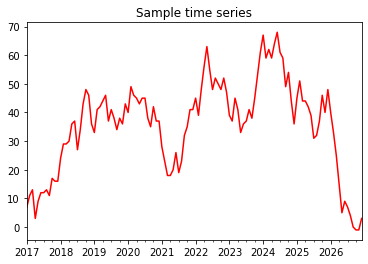

In [17]:
sampleTs.plot(c='r', title='Sample time series')

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2023-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2025-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2027-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 2A-DEC, dtype: object

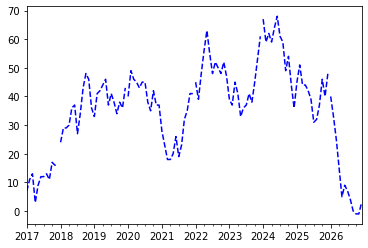

In [18]:
sampleTs.resample('2A').plot(c='b', ls='--')

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2022-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2027-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 5A-DEC, dtype: object

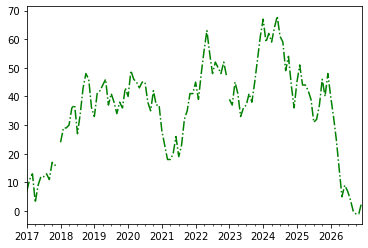

In [19]:
sampleTs.resample('5A').plot(c='g', ls='-.')

**Lag Plot**

The Lag Plot is a very important and useful visualization for Time Series Data.

Time Series is a Univariate Data.

In the lag plot, you plotted the actual data against the data with a time lag. This helps in determining how the current data is predicting the future data.

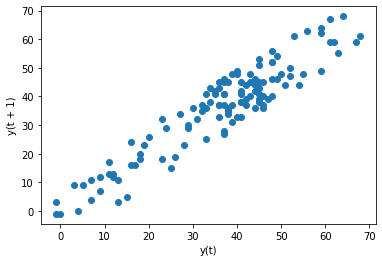

In [20]:
from pandas.plotting import lag_plot
lag_plot(sampleTs)

**Auto Correction Plot**

Autocorrelation plot goes one step further.

Auto Correlation refers to correlating the data with itself. Here we are correlating the data with a one-time lag.

The plot gives a more accurate picture of how the data point is correlated among themselves.

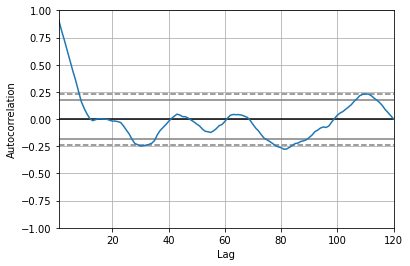

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)

# When the autocorrelation plot shows an exponential behavior, the time series is stationary.

# Stationarity

Stationarity is a very significant property in Time Series Analysis. In Time series, data is collected at different time intervals. The data might behave in a deterministic or stochastic nature.

Models can be applied only when your data is deterministic. If the nature of the data is stochastic then the model results will not be interpretable. Hence we have to check this property before applying the model.

- In statistical terms, the mean, variance and the temporal correlation remain constant over time.

- A simpler definition is that there are no seasonal or trend components in the time series.

 - Data Visualization: You can look at your data and see if there are any trends or patterns. This is a very crude approach.

 - Summary Statistics: You can take some summary statistics at different time intervals and see how the data behaves.

 - Statistical Tests: You can apply certain specific statistical tests and check if your time series supports stationarity property.


 **Augmented Dickey - Fuller test**

ADF test is the best way to determine if the time series data is stationary or not.

This kind of test is known as Unit Root Test.

The main objective of this test is that it identifies how the trend component determines the time series.

ADF test makes use of an autoregressive model and optimizes its criteria across multiple lag values.

The Null Hypothesis supposes that the time series is non-stationary.

The alternate hypothesis is that the time series is stationary.

**Interpreting the Results**

Null Hypothesis: H0 - If accepted then the time series data is non-stationary, and it has a unit root.

Alternate Hypothesis: H1 - The null hypothesis is rejected. The time series data is stationary and does not have any unit root.

Results

p-value > 0.05: Accept the (H0), the data is non-stationary and has a unit root.

p-value <= 0.05: Reject the H0, the data is stationary and does not have a unit root.

**Auto Correlation Function**

Another way of determining stationarity is Autocorrelation Function. Here, you find the correlation between two data points that are one time step away.

When you visualize this correlation, you can get insights on the stationarity of the time series.

If the ACF plot is having an exponential decay, it means the time series is stationary.

In [22]:
# In Python, the statsmodels package has a method named adffuller that can be used for stationarity check.
# Once you pass your time series to this method, you will be able to get the results.

# ADF Statistic: 
# p-value: 
# 	1%: 
# 	5%: 
# 	10%:



# The more negative the ADF statistic value is the more likely the data is stationary.

# The ADF Statistic should be compared to critical p-values that are at 1, 5, and 10%.

# If the ADF statistic value is less than the critical value at 5% and the p-value is less than 0.05, 
# then we can reject the null hypothesis that the data is non-stationary with 95% confidence level.


from statsmodels.tsa.stattools import adfuller
adfuller(sampleTs)

(-1.832587341641146,
 0.3644071636023165,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 673.7035064206195)

**Example**

In [23]:
import random 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()

tsResult = adfuller(sampleTs)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.869292
p-value: 0.797917
	1%: -3.487
	5%: -2.886
	10%: -2.580


The ADF Statistic value is -1.328310. It is negative.

The p-value: 0.616123 and is greater than 0.05 so we accept the null hypothesis, which means the data is non-stationary.

# Trends and Patterns

- Trend: This component shows the overall series behavior - the slow change of values over time.

- Season: This shows the changes that happen in cycles that are less than one year.

- Cycles: Changes that happen for more than a year.

- Random: Anything that is not included in the above three components.

The underlying assumption has to be that the time series data is stationary.

**Steps**

Check for Stationarity.

Decompose the model into its various components.

Analyse the components.

Fit the time series forecasting model and predict future values.

**Time Series Difference**

Apart from the decomposing the Time Series, there is another method, you can follow while analysis is the difference.

You take the difference between two time periods. The difference can have a shift of one time period or more.

This process also helps in understanding the data better.


**Decomposing**

Python used statsmodels package seasonal_decompose method for time series decomposing.

You can just pass the time series and call the respective decomposing function to get the results.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

# Here you can get the trend, seasonal, and residuals separately for the time series.

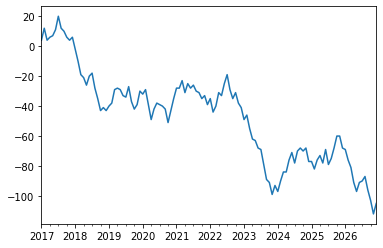

In [26]:
sampleTs.plot()

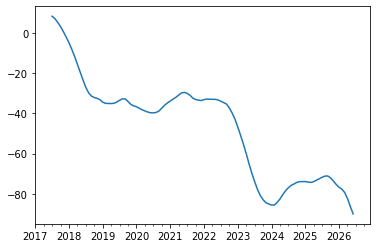

In [25]:
sampleTs_trend.plot()

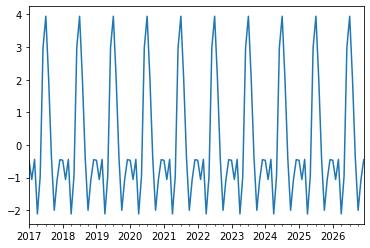

In [27]:
sampleTs_seasonal.plot()

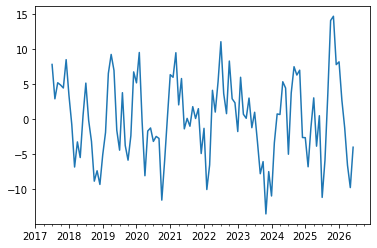

In [28]:
sampleTs_residual.plot()

# Forecasting

Forecasting in time series can be done in several ways.

Autoregressive

Moving Average

Autoregressive Moving Average

Autoregressive Integrated Moving Average

**Autoregression**

In Autoregression, you use the current value of the variable to predict its future values.

Here, the current and past time stamp values of the time series are used to predict the future values.

In [38]:
from statsmodels.tsa.arima_model import ARIMA 
model = ARIMA(sampleTs, order=(1, 1, 0)) 
predValues = model.fit()
# The parameter order = is very important in calling the right function for forecasting.

**Moving average**

Moving average is another way to predict the time series data.

Here the dependent variable is expressed as a function of the previous values along with an average component.

Average component keeps moving along the time series.

In [40]:
model = ARIMA(sampleTs, order=(0, 1, 1)) 

movingAvgRes = model.fit() 

**Selecting p and q**


The p and q parameters of the Autoregressive and Moving Average models. These parameters have to be selected by how they fit the historical data.

The AIC or BIC have to be validated among the results and the model which has the lowest value should be chosen.

AIC stands for Akaike Information Criterion.

BIC stands for Bayesian Information Criterion.

**ARIMA**

ARIMA is the combination of Autoregressive and Moving Average.

ARIMA stands for Autoregressive Integrated Moving Average.

It is another model used for forecasting in Time Series Analysis.

In [42]:
model = ARIMA(sampleTs, order=(1, 0, 1)) 

arimares = model.fit() 


**Steps in Time Series**


The first step is to visualize the time series.

The second step is to make the data stationary.

 - This can be accomplished by 

 - Detrending 

 - Differencing

 - Seasonality 
Getting the optimal parameters through Auto Correlation and Partial Auto Correlation

Build Model (AR , MA , ARMA , ARIMA) using the parameters

Make Prediction